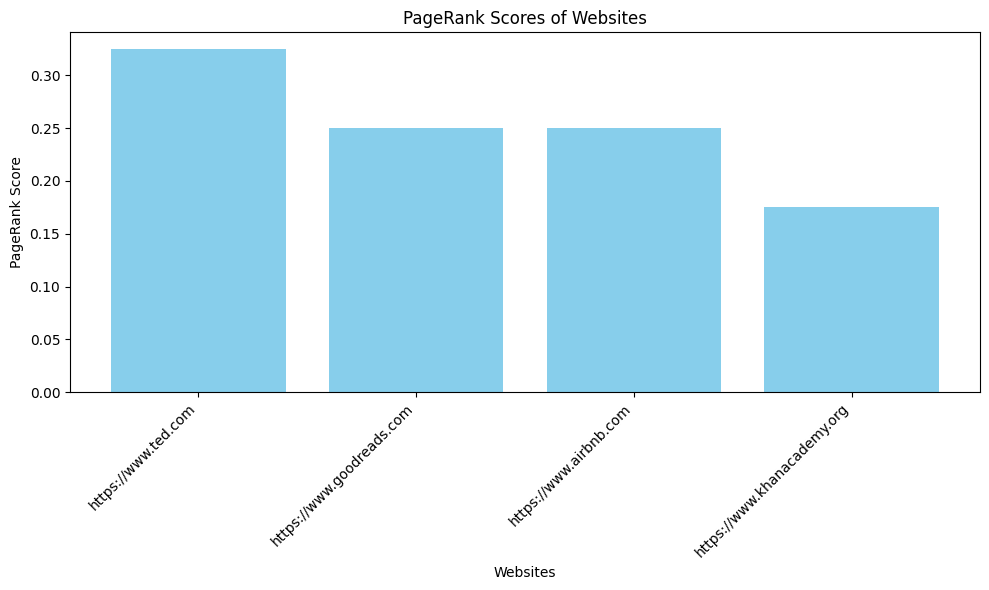

In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Manual link map for testing
link_map = {
    'https://www.ted.com': {'https://www.goodreads.com', 'https://www.khanacademy.org'},
    'https://www.goodreads.com': {'https://www.airbnb.com'},
    'https://www.airbnb.com': {'https://www.ted.com'},
    'https://www.khanacademy.org': {'https://www.ted.com', 'https://www.goodreads.com'}
}

# Parameters for the PageRank algorithm
d = 0.85
num_iterations = 100
websites = list(link_map.keys())
pagerank = {url: 1.0 / len(websites) for url in websites}

# PageRank calculation loop
for _ in range(num_iterations):
    new_pagerank = {}
    for url in websites:
        new_rank = (1 - d) / len(websites)
        for linking_url in websites:
            if url in link_map[linking_url] and len(link_map[linking_url]) > 0:
                new_rank += d * (pagerank[linking_url] / len(link_map[linking_url]))
        new_pagerank[url] = new_rank
    pagerank = new_pagerank

# Sort the PageRank results for display
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Extract URLs and scores for plotting
urls, scores = zip(*sorted_pagerank)

# Plotting the PageRank scores as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(urls, scores, color='skyblue')
plt.xlabel('Websites')
plt.ylabel('PageRank Score')
plt.title('PageRank Scores of Websites')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
